In [1]:
# Installing pySpark

!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=ae8b5cab82e3a43a456500a8984ffded6aa831eeea3fa5199a6176948472103a
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
# Intsalling Hive

!pip install hive


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.5/135.5 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 4.7 MB/s eta 0:00:00
  Using cached Paste-3.5.2-py2.py3-none-any.whl (593 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 KB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.5/363.5 KB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 KB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.0/730.0 KB 23.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Creating a SparkSession and Access to the Hive Metastore
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .enableHiveSupport() \
    .getOrCreate()

In [ ]:
# Reading the data from our local file
df_merged = spark.read.csv('/content/Cleaned_aaliyahs_merged_fashion_dataset.csv', header=True)

# Saving the DataFrame as a Hive table
df_merged.write.saveAsTable("aaliyahs_fashion_dataset_cleaned6")

result = spark.sql("SELECT * FROM aaliyahs_fashion_dataset_cleaned6")
result.show(100)


+--------+-------------------+--------------------+------+----------+-----------+-----------+
|brand_id|              brand|                name| price|    colour|ratingCount| avg_rating|
+--------+-------------------+--------------------+------+----------+-----------+-----------+
|   242.0|     Dupatta Bazaar|Dupatta Bazaar Wh...| 899.0|     White|     1321.0|4.548826646|
|   750.0|           Roadster|Roadster Women Mu...|1199.0|   Mustard|     5462.0|4.313255218|
|   389.0|             Inddus|Inddus Peach-Colo...|5799.0|     Peach|      145.0|4.068965517|
|     0.0|          SASSAFRAS|SASSAFRAS Women B...|1499.0|     Black|     9124.0|4.147523016|
|   482.0|              Kotty|Kotty Women Black...|1999.0|     Black|    12260.0|4.078466558|
|     0.0|          KASSUALLY|KASSUALLY Women B...|2199.0|     Black|     6297.0|4.349213911|
|     0.0|          SASSAFRAS|Sassafras Brown &...|1499.0|     Brown|     7358.0|4.395351998|
|   793.0|               Sera|Sera Women Multic...|1494.0|  

In [ ]:
# 1. Analysis of the average rating for each brand in descending order

result = spark.sql("SELECT brand, AVG(avg_rating) AS avg_rating FROM aaliyahs_fashion_dataset_cleaned6 GROUP BY brand ORDER BY avg_rating DESC")
result.show(20)
result.write.csv('/content/#2_Analysis_fashion_dataset.csv', header=True)



+--------------------+------------------+
|               brand|        avg_rating|
+--------------------+------------------+
|              Reebok|       4.833333333|
|   Allen Solly Tribe|       4.769230769|
|      Angel & Rocket|       4.727272727|
|                 KBZ|       4.677419355|
|Dexter by Kook N ...|       4.652173913|
|        Juniper Plus|              4.65|
|          Swishchick|             4.625|
|Kook N Keech Loon...|             4.625|
|          QUARANTINE|               4.6|
|           JUNEBERRY|               4.6|
|          Ed-a-Mamma| 4.595238095333333|
|              Faserz| 4.583333333500001|
|           BlissClub|       4.583333333|
|                 513|       4.530007949|
|            ADDYVERO| 4.511485042666666|
|                Zeyo|               4.5|
|              Amante|4.4646464644999995|
|FORCLAZ By Decathlon|       4.463276836|
| Domyos By Decathlon|       4.452380952|
|               BOWER|              4.45|
+--------------------+------------

In [ ]:
result.write.csv('/content/#1_Analysis_fashion_dataset.csv', header=True)


In [ ]:
# 2. Analysis of brands with the highest prices in descending order

result = spark.sql("SELECT brand, MAX(price) AS max_price FROM aaliyahs_fashion_dataset_cleaned6 GROUP BY brand ORDER BY max_price DESC")

result.show(20)
result.write.csv('/content/brandswithhighestprice_fashion_dataset.csv', header=True)


+------------------+---------+
|             brand|max_price|
+------------------+---------+
|       Amrutam Fab|   9999.0|
|          FABPIXEL|   9999.0|
|Calvin Klein Jeans|   9999.0|
|           HONNETE|   9999.0|
|             Ishin|   9999.0|
|           JATRIQQ|   9999.0|
|             KAAJH|   9999.0|
|            BEAVER|   9999.0|
|            Mitera|   9999.0|
|       New Balance|   9999.0|
|              Puma|   9999.0|
|         RAJGRANTH|   9999.0|
|        Warthy Ent|   9999.0|
|              ZOLA|   9999.0|
|            anayna|   9999.0|
|          iki chic|   9999.0|
|           panchhi|   9999.0|
|             Libas|   9999.0|
|             GUESS|   9999.0|
|              Soch|   9998.0|
+------------------+---------+
only showing top 20 rows



In [ ]:
# 3. Analysis of the average price of products by brands in descending order

result = spark.sql("SELECT brand, AVG(price) AS avg_price FROM aaliyahs_fashion_dataset_cleaned6 GROUP BY brand ORDER BY avg_price DESC")

result.show(20)

+-----------------+------------------+
|            brand|         avg_price|
+-----------------+------------------+
|   MOKSHA DESIGNS|24865.833333333332|
|        SAPTRANGI|           22499.0|
|           Masaba| 20888.88888888889|
|Teakwood Leathers|           19999.0|
|         NAKKASHI|17537.166666666668|
|       WHITE FIRE|16727.136363636364|
|        Justanned|          15748.25|
|          Mameraa|         15370.375|
|         PinkLoom|           14420.0|
|        SHUBHKALA|14294.736842105263|
|      SHUBHVASTRA|           12856.0|
|        BEATITUDE|11759.777777777777|
|      Amrutam Fab|           11749.0|
|             GANT|11665.666666666666|
|        MS RETAIL|           11625.0|
| SHADOW & SAINING|11278.846153846154|
|            kasee|           10658.0|
|           Netram|10477.826086956522|
|         SHOPGARB|10472.947368421053|
|           Neerus|           10300.0|
+-----------------+------------------+
only showing top 20 rows



In [ ]:
# 4. Analysis of frequently purchased colours in ascending order
result = spark.sql("SELECT colour, COUNT(*) AS count FROM aaliyahs_fashion_dataset_cleaned6 GROUP BY colour ORDER BY count ASC")
result.show(20)
result.write.csv('/content/frequentlypurchasedcolors_fashion_dataset.csv', header=True)


+-----------------+-----+
|           colour|count|
+-----------------+-----+
|        Champagne|    1|
|        Rose Gold|    1|
|         Assorted|    2|
|           Bronze|    2|
|                0|    4|
|           Copper|    5|
|             Nude|    8|
|      Camel Brown|    9|
|              Tan|   11|
|           Silver|   12|
|           Violet|   13|
|Fluorescent Green|   17|
|            Taupe|   18|
|     Coffee Brown|   25|
|            Khaki|   27|
|     Grey Melange|   42|
|             Rose|   44|
|       Lime Green|   50|
|            Mauve|   51|
|          Fuchsia|   52|
+-----------------+-----+
only showing top 20 rows



In [ ]:
# MapReduce: to count number of products for each colour in our dataset;
# Using the DataFrame API in PySpark to perform MapReduce operations

# Loading the data into a DataFrame
df_merged = spark.read.csv('/content/Cleaned_aaliyahs_merged_fashion_dataset.csv', header=True)

# Counting the number of products for each colour
df_merged.groupBy('colour').count().show()


+------------+-----+
|      colour|count|
+------------+-----+
|      Copper|    5|
|        Teal|  191|
|   Champagne|    1|
|       Khaki|   27|
|     Mustard|  325|
|       Olive|  252|
|    Assorted|    2|
|      Orange|  286|
|        Rose|   44|
|        Rust|  108|
|       Peach|  298|
|           0|    4|
|       Multi|  143|
|       Beige|  483|
|     Fuchsia|   52|
|       Coral|   81|
|    Burgundy|  144|
|       Cream|  157|
|         Tan|   11|
|Coffee Brown|   25|
+------------+-----+
only showing top 20 rows



In [ ]:
# saving the mapreduce output to CSV
df_counts = df_merged.groupby('colour').size().reset_index(name='count')
df_counts.to_csv('/content/mapreduce_fashion_dataset.csv', index=False)


In [ ]:
# Machine Learning Model: Splitting the dataset into train and test using 'pandas.DataFrame.sample'
# method to randomly select 70% of the data as the training set.
# The remaining 30% of the data will be used as the test set.

import pandas as pd

df_merged = pd.read_csv("/content/Cleaned_aaliyahs_merged_fashion_dataset.csv")

# Selecting the features and labels from our dataset

X = df_merged[['brand_id', 'price', 'ratingCount']]
y = df_merged['avg_rating']

# Calculate the number of samples in the training set
num_samples = int(len(df_merged) * 0.8)

# Randomly select the samples for the training set
X_train = X.sample(num_samples, random_state=42)
y_train = y.loc[X_train.index]

X_train


,brand_id,price,ratingCount
9727,557.0,995.0,383.0
9157,726.0,4330.0,0.0
8788,696.0,2040.0,0.0
12553,397.0,2999.0,814.0
6494,397.0,5299.0,242.0
...,...,...,...
4531,691.0,1999.0,0.0
9866,95.0,2499.0,161.0
365,0.0,2599.0,28.0
11439,51.0,1799.0,13.0


In [ ]:
# Randomly select the samples for the training set
X_train = X.sample(num_samples, random_state=42)
y_train = y.loc[X_train.index]

y_train

9727     3.120104
9157     0.000000
8788     0.000000
12553    4.343980
6494     4.243802
           ...   
4531     0.000000
9866     3.993789
365      3.750000
11439    4.769231
14118    0.000000
Name: avg_rating, Length: 11315, dtype: float64

In [ ]:
# Select the remaining samples as the test set
X_test = X.drop(X_train.index)
y_test = y.drop(X_train.index)

X_test

,brand_id,price,ratingCount
1,750.0,1199.0,5462.0
4,482.0,1999.0,12260.0
5,0.0,2199.0,6297.0
9,75.0,4699.0,84.0
11,0.0,3599.0,1005.0
...,...,...,...
14121,0.0,7999.0,0.0
14122,845.0,1699.0,47.0
14125,958.0,2299.0,0.0
14128,471.0,2100.0,0.0


In [ ]:
X_test = X.drop(X_train.index)
y_test = y.drop(X_train.index)

y_test

1        4.313255
4        4.078467
5        4.349214
9        3.809524
11       3.980100
           ...   
14121    0.000000
14122    4.234043
14125    0.000000
14128    0.000000
14141    0.000000
Name: avg_rating, Length: 2829, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Creating a Pipeline with StandardScaler and Linear Regression model
model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

# Fit the model to the training data
model.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model.predict(X_test)

predictions



array([5.61435396, 9.59192027, 5.70822663, ..., 2.18376495, 2.02369016,
       1.90194859])

In [ ]:
# To evaluate the performance of our model, calculate the mean squared error, mean absolute error
# and root mean squared error

from sklearn import metrics
import numpy as np

# Make predictions on the test data
predictions = model.predict(X_test)

print("Mean squared error:", metrics.mean_squared_error(y_test, predictions))
print("Mean absolute error:", metrics.mean_absolute_error(y_test, predictions))
print("Root Mean squared error:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean squared error: 4.0193718165088415
Mean absolute error: 1.942436008874126
Root Mean squared error: 2.004837104731664


In [ ]:
# Predict the average rating of a new product from our model
# Using the model to make predictions of a new product a with brand id 235, price 2900, and 50 ratings.

lr = LinearRegression()
lr.fit(X_train, y_train)

new_product = [[235, 2900, 50]]
prediction = lr.predict(new_product)
print("Predicted average rating:", prediction)

Predicted average rating: [1.85761878]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


The model made a prediction for the average rating of the new product, and the prediction was printed to the console. However, i keep getting the warning message about feature names, from my research it is said to simply be a reminder that the input data does not have valid feature names, but it does not affect the accuracy of the prediction.

Furthermore, the prediction is only an estimate and may not match the true average rating of the product. The accuracy of the prediction depends on the quality of the model and from our model evaluation using MSE and MAE the model seems to be accurate.

In [ ]:
# Unsupervised Machine Learning Model, Using clustering

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Cleaned_aaliyahs_merged_fashion_dataset.csv')
df


,brand_id,brand,name,price,colour,ratingCount,avg_rating
0,242.0,Dupatta Bazaar,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,1321.0,4.548827
1,750.0,Roadster,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,5462.0,4.313255
2,389.0,Inddus,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,145.0,4.068966
3,0.0,SASSAFRAS,SASSAFRAS Women Black Parallel Trousers,1499.0,Black,9124.0,4.147523
4,482.0,Kotty,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,12260.0,4.078467
...,...,...,...,...,...,...,...
14139,880.0,The Chennai Silks,The Chennai Silks Pink & Silver-Toned Floral Z...,3999.0,Pink,0.0,0.000000
14140,471.0,Kinder Kids,Kinder Kids Girls Blue & Green Printed Foil Pr...,2050.0,Blue,0.0,0.000000
14141,0.0,KLOTTHE,KLOTTHE Women Green & Black Floral Printed Pal...,1659.0,Green,0.0,0.000000
14142,0.0,InWeave,InWeave Women Red Printed A-Line Skirt,2399.0,Red,0.0,0.000000


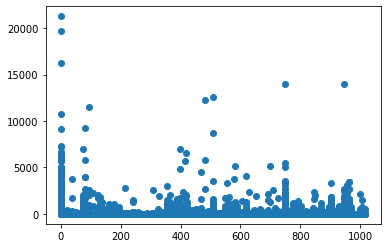

In [ ]:
plt.scatter(df['brand_id'],df['ratingCount'])

In [ ]:
km= KMeans(n_clusters=3, random_state=0)

In [ ]:
df1= df[['brand_id','ratingCount']]
df1

,brand_id,ratingCount
0,242.0,1321.0
1,750.0,5462.0
2,389.0,145.0
3,0.0,9124.0
4,482.0,12260.0
...,...,...
14139,880.0,0.0
14140,471.0,0.0
14141,0.0,0.0
14142,0.0,0.0


In [ ]:
predict_y= km.fit_predict(df1)
predict_y
#km.labels_

array([0, 2, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
km.cluster_centers_

array([[  67.18894309,   45.94341463],
       [ 731.21522364,   91.91957325],
       [ 214.55555556, 7514.73333333]])

In [ ]:
df['cluster']=predict_y
df

,brand_id,brand,name,price,colour,ratingCount,avg_rating,cluster
0,242.0,Dupatta Bazaar,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,1321.0,4.548827,0
1,750.0,Roadster,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,5462.0,4.313255,2
2,389.0,Inddus,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,145.0,4.068966,0
3,0.0,SASSAFRAS,SASSAFRAS Women Black Parallel Trousers,1499.0,Black,9124.0,4.147523,2
4,482.0,Kotty,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,12260.0,4.078467,2
...,...,...,...,...,...,...,...,...
14139,880.0,The Chennai Silks,The Chennai Silks Pink & Silver-Toned Floral Z...,3999.0,Pink,0.0,0.000000,1
14140,471.0,Kinder Kids,Kinder Kids Girls Blue & Green Printed Foil Pr...,2050.0,Blue,0.0,0.000000,1
14141,0.0,KLOTTHE,KLOTTHE Women Green & Black Floral Printed Pal...,1659.0,Green,0.0,0.000000,0
14142,0.0,InWeave,InWeave Women Red Printed A-Line Skirt,2399.0,Red,0.0,0.000000,0


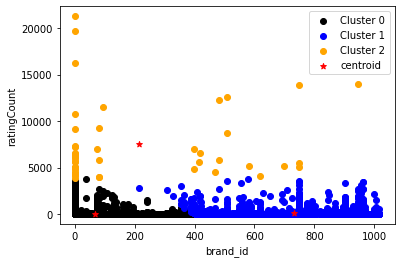

In [ ]:
# DATA VISUALIZATION FOR CLUSTERING USING PYTHON

df_c0= df[df.cluster==0]
df_c1=df[df.cluster==1]
df_c2=df[df.cluster==2]

plt.scatter(df_c0['brand_id'], df_c0['ratingCount'], label='Cluster 0', color='black')
plt.scatter(df_c1['brand_id'], df_c1['ratingCount'], label='Cluster 1',color='blue')
plt.scatter(df_c2['brand_id'], df_c2['ratingCount'], label='Cluster 2',color='orange')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],color='red', marker='*', label ='centroid')

plt.xlabel('brand_id')
plt.ylabel('ratingCount')
plt.legend()

In [ ]:
#Clusters are formed properly, scaling is required

scaler=MinMaxScaler()
scaler.fit(df[['ratingCount']])
df[['ratingCount']]= scaler.transform(df[['ratingCount']])
df

,brand_id,brand,name,price,colour,ratingCount,avg_rating,cluster
0,242.0,Dupatta Bazaar,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,0.062095,4.548827,0
1,750.0,Roadster,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,0.256745,4.313255,2
2,389.0,Inddus,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,0.006816,4.068966,0
3,0.0,SASSAFRAS,SASSAFRAS Women Black Parallel Trousers,1499.0,Black,0.428880,4.147523,2
4,482.0,Kotty,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,0.576290,4.078467,2
...,...,...,...,...,...,...,...,...
14139,880.0,The Chennai Silks,The Chennai Silks Pink & Silver-Toned Floral Z...,3999.0,Pink,0.000000,0.000000,1
14140,471.0,Kinder Kids,Kinder Kids Girls Blue & Green Printed Foil Pr...,2050.0,Blue,0.000000,0.000000,1
14141,0.0,KLOTTHE,KLOTTHE Women Green & Black Floral Printed Pal...,1659.0,Green,0.000000,0.000000,0
14142,0.0,InWeave,InWeave Women Red Printed A-Line Skirt,2399.0,Red,0.000000,0.000000,0


In [ ]:
scaler.fit(df[['brand_id']])
df[['brand_id']]= scaler.transform(df[['brand_id']])
df

,brand_id,brand,name,price,colour,ratingCount,avg_rating,cluster
0,0.237955,Dupatta Bazaar,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,0.062095,4.548827,0
1,0.737463,Roadster,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,0.256745,4.313255,2
2,0.382498,Inddus,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,0.006816,4.068966,0
3,0.000000,SASSAFRAS,SASSAFRAS Women Black Parallel Trousers,1499.0,Black,0.428880,4.147523,2
4,0.473943,Kotty,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,0.576290,4.078467,2
...,...,...,...,...,...,...,...,...
14139,0.865290,The Chennai Silks,The Chennai Silks Pink & Silver-Toned Floral Z...,3999.0,Pink,0.000000,0.000000,1
14140,0.463127,Kinder Kids,Kinder Kids Girls Blue & Green Printed Foil Pr...,2050.0,Blue,0.000000,0.000000,1
14141,0.000000,KLOTTHE,KLOTTHE Women Green & Black Floral Printed Pal...,1659.0,Green,0.000000,0.000000,0
14142,0.000000,InWeave,InWeave Women Red Printed A-Line Skirt,2399.0,Red,0.000000,0.000000,0


In [ ]:
km= KMeans(n_clusters=3, random_state=0)

In [ ]:
df1= df[['brand_id','ratingCount']]
df1

,brand_id,ratingCount
0,0.237955,0.062095
1,0.737463,0.256745
2,0.382498,0.006816
3,0.000000,0.428880
4,0.473943,0.576290
...,...,...
14139,0.865290,0.000000
14140,0.463127,0.000000
14141,0.000000,0.000000
14142,0.000000,0.000000


In [ ]:
predict_y = km.fit_predict(df1)
predict_y

array([0, 1, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
df['New_clusters']=predict_y
df

,brand_id,brand,name,price,colour,ratingCount,avg_rating,cluster,New_clusters
0,0.237955,Dupatta Bazaar,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,0.062095,4.548827,0,0
1,0.737463,Roadster,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,0.256745,4.313255,2,1
2,0.382498,Inddus,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,0.006816,4.068966,0,0
3,0.000000,SASSAFRAS,SASSAFRAS Women Black Parallel Trousers,1499.0,Black,0.428880,4.147523,2,2
4,0.473943,Kotty,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,0.576290,4.078467,2,0
...,...,...,...,...,...,...,...,...,...
14139,0.865290,The Chennai Silks,The Chennai Silks Pink & Silver-Toned Floral Z...,3999.0,Pink,0.000000,0.000000,1,1
14140,0.463127,Kinder Kids,Kinder Kids Girls Blue & Green Printed Foil Pr...,2050.0,Blue,0.000000,0.000000,1,0
14141,0.000000,KLOTTHE,KLOTTHE Women Green & Black Floral Printed Pal...,1659.0,Green,0.000000,0.000000,0,2
14142,0.000000,InWeave,InWeave Women Red Printed A-Line Skirt,2399.0,Red,0.000000,0.000000,0,2


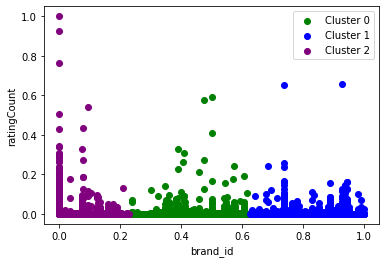

In [ ]:
df_c0= df[df.New_clusters==0]
df_c1=df[df.New_clusters==1]
df_c2=df[df.New_clusters==2]

plt.scatter(df_c0['brand_id'], df_c0['ratingCount'], label='Cluster 0', color='green')
plt.scatter(df_c1['brand_id'], df_c1['ratingCount'], label='Cluster 1',color='blue')
plt.scatter(df_c2['brand_id'], df_c2['ratingCount'], label='Cluster 2',color='purple')

plt.xlabel('brand_id')
plt.ylabel('ratingCount')
plt.legend()


In [ ]:
km.cluster_centers_

array([[0.43244241, 0.00419237],
       [0.81760528, 0.00493484],
       [0.02861303, 0.00359032]])

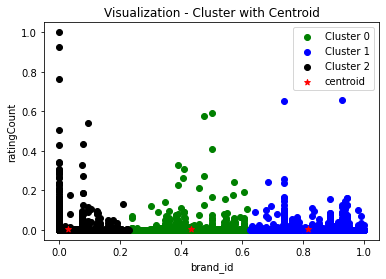

In [ ]:
# Adding the Centroid

df_c0= df[df.New_clusters==0]
df_c1=df[df.New_clusters==1]
df_c2=df[df.New_clusters==2]

plt.scatter(df_c0['brand_id'], df_c0['ratingCount'], label='Cluster 0', color='green')
plt.scatter(df_c1['brand_id'], df_c1['ratingCount'], label='Cluster 1',color='blue')
plt.scatter(df_c2['brand_id'], df_c2['ratingCount'], label='Cluster 2',color='black')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],color='red', marker='*', label ='centroid')

plt.xlabel('brand_id')
plt.ylabel('ratingCount')
plt.title('Visualization - Cluster with Centroid')
plt.legend()

In [ ]:
#Adding the elbow method, calculate SSE (Sum of Square)

k_range=range(1,10)
sse=[]
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['brand_id', 'ratingCount']])
    sse.append(km.inertia_)

sse

[1625.447510987483,
 261.7903781728247,
 104.66179310177598,
 64.3569121475407,
 42.24761008913402,
 26.24322662367137,
 22.86404198834808,
 19.175388357034283,
 16.248358443957613]

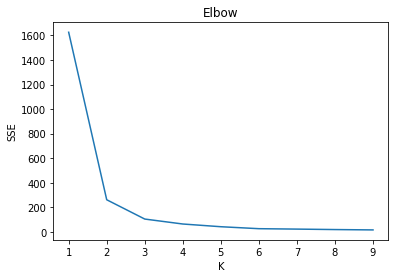

In [ ]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow')
plt.plot(k_range,sse)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


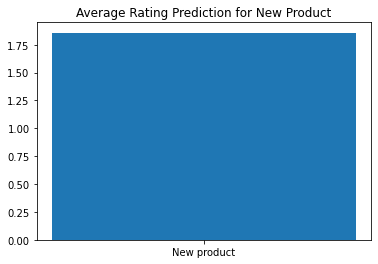

In [ ]:
# DATA VISUALIZATION FOR LINEAR REGRESSION RESULT USING PYTHON

import matplotlib.pyplot as plt

# Make predictions for the new data point
prediction = lr.predict(new_product)

# Create a bar plot with the prediction as the height of the bar
plt.bar(['New product'], prediction)

# Show the plot
plt.title('Average Rating Prediction for New Product')
plt.show()


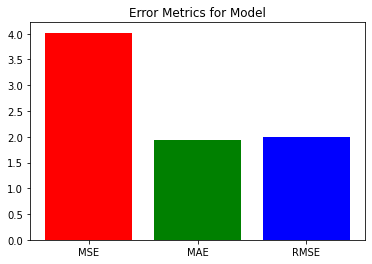

In [ ]:
import matplotlib.pyplot as plt

# Calculate the MSE, MAE, and RMSE
mse = metrics.mean_squared_error(y_test, predictions)
mae = metrics.mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)

# Create a list of the error values
errors = [mse, mae, rmse]

# Create a list of the error names
error_names = ['MSE', 'MAE', 'RMSE']

# Create a bar plot of the errors

plt.bar(error_names, errors, color=['red', 'green', 'blue'])

plt.title('Error Metrics for Model')
plt.show()



Below is another method to calculated MSE and MAE (For personal consumption, Revisit after assessment)

In [ ]:
# To evaluate the performance of our model, calculate the mean absolute error

from sklearn.metrics import mean_absolute_error

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, predictions)

print("Mean absolute error:", mae)


Mean absolute error: 1.942436008874126


In [ ]:
# To evaluate the performance of our model, calculate the mean squared error

from sklearn.metrics import mean_squared_error

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)


print("Mean squared error:", mse)

Mean squared error: 4.0193718165088415
